# ROUND 2

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [5]:
data.shape

(10910, 26)

In [6]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [7]:
data = data.drop(['Unnamed: 0'],axis=1)
data.columns = list(map(lambda x: str.lower(x), data.columns))
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [8]:
# show numerical cols
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [9]:
# show categorical cols
data.describe(include=object).T

,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10279,5,California,3552
response,10279,2,No,8813
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
effective to date,10910,59,1/10/11,239
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319


In [10]:
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [11]:
# observing the data
data['state'].value_counts(dropna=False)
data['vehicle type'].value_counts(dropna=False)
data['vehicle size'].value_counts(dropna=False)
data['response'].value_counts(dropna=False)
data['months since last claim'].value_counts(dropna=False)
data['number of open complaints'].value_counts(dropna=False)
data['vehicle class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [12]:
### functions
def norm(dataframe: pd.DataFrame, col, filler):
    dataframe[col] = dataframe[col].fillna(filler)
    filler

norm(data, 'state', 'Unknown')
norm(data, 'vehicle type', data['vehicle type'].value_counts(dropna=False).index[1])        # 'A'
norm(data, 'vehicle class', data['vehicle class'].value_counts(dropna=False).index[0])      # 'Four-Door Car'
norm(data, 'vehicle size', data['vehicle size'].value_counts(dropna=False).index[0])        #
norm(data, 'response', data['response'].value_counts(dropna=False).index[0])
norm(data, 'months since last claim', 0)
norm(data, 'number of open complaints', 0)

In [13]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [14]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [15]:
pd.set_option('display.max_columns', None)
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,0.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [16]:
# converting column values to dates
dates = data['effective to date']
dates = list(map(pd.to_datetime, dates))
dates

# filter out the month of date for each row
months = list(map(lambda x: x.month, dates))
months = pd.DataFrame(months, columns=['month'])
months
months.value_counts()
# -----> everything in Jan / Feb


month
1        5818
2        5092
dtype: int64

In [17]:
# print all rows with month <= 3
data[months['month'] <= 3]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,0.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [18]:
##### TEST: just print all rows with month == 1 (january)
data[months['month'] == 1]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,A
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,Suburban,Married,85,19.0,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,0.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


# ROUND 3

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

In [21]:
data.describe().T
data.describe(include=object).T

,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,6,California,3552
response,10910,2,No,9444
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
effective to date,10910,59,1/10/11,239
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319


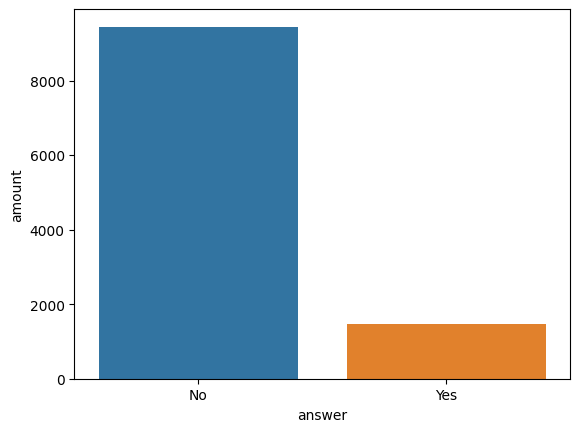

In [22]:
res = data['response'].value_counts(dropna=False)
q = res.to_frame()
q['answer'] = q.index
q = q.rename(columns={'response':'amount'})
q
sns.barplot(x='answer', y='amount', data=q)
plt.show()

In [23]:
# response rate  =  count Yes / num of rows
rate = data['response'].value_counts()['Yes'] / len(data)
rate 

0.13437213565536205

In [24]:
# new col with the rates
def check_answer(_):
    if _ == 'No':
        return 1 - rate
    else:
        return rate

data['response rate'] = list(map(check_answer, data['response']))
data['response num'] = data['response'].map(dict(Yes=1, No=0))
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,response rate,response num
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,0.865628,0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,0.865628,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,0.865628,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,0.134372,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,0.865628,0


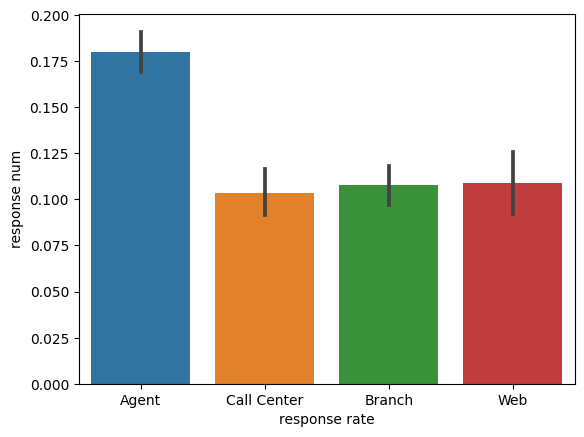

In [25]:
# response - channel

s = sns.barplot(x=data['sales channel'], y=data['response num'])
s.set(xlabel='response rate')
plt.show()

In [29]:
# generic bin func

def bin_me(x, bins, max, digits):
    for i in range(bins):
        r = (max / bins) * (i + 1)
        if x <= r:
            return round(r, digits)

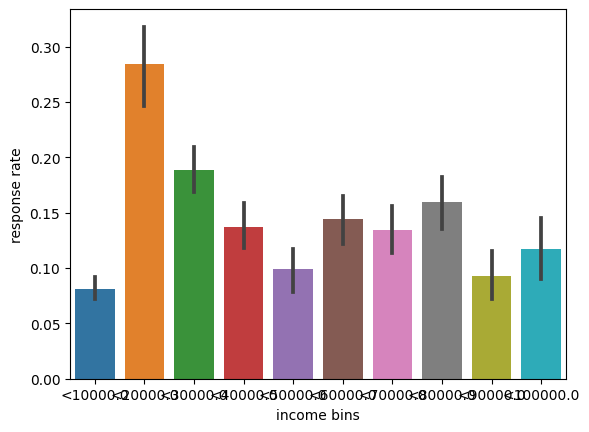

In [30]:
# response - income

b = 10
m = data['income'].max()
data['bins income'] = list(map(lambda i: bin_me(i, bins=b, max=m, digits=-3), data['income']))

# set ordering of the bins 
ord = list(map(lambda i: f'<{i}', sorted(data['bins income'].unique())))

# set the naming of the bins
data['bins income'] = data['bins income'].map({i:f"<{i}" for i in data['bins income']})


t = sns.barplot(x='bins income', y='response num', data=data, order=ord)
t.set(xlabel='income bins', ylabel='response rate')
plt.show()

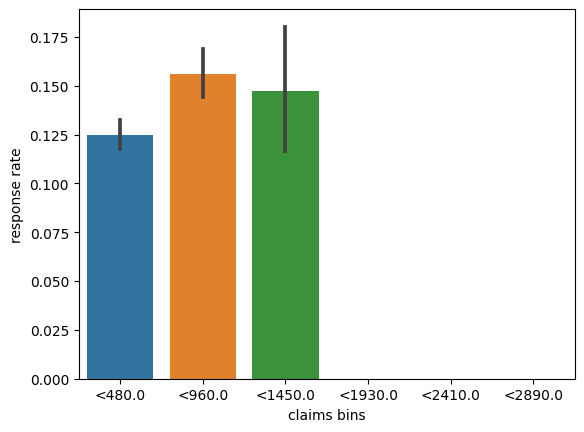

In [32]:
# response - claims

b = 6
m = data['total claim amount'].max()
data['bins claims'] = list(map(lambda x: bin_me(x, bins=b, max=m, digits=-1), data['total claim amount']))

ord = list(map(lambda i: f'<{i}', sorted(data['bins claims'].unique())))

data['bins claims'] = data['bins claims'].map({i:f"<{i}" for i in data['bins claims']})

t = sns.barplot(x='bins claims', y='response num', data=data, order=ord)
t.set(xlabel='claims bins', ylabel='response rate')
plt.show()